In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout, AvgPool2D
import numpy as np
import matplotlib.pyplot as plt
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7



In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
y_train=tf.one_hot(y_train, 10)
y_test=tf.one_hot(y_test, 10)

In [4]:
x_train=x_train.reshape((x_train.shape[0],28,28, 1)).astype('float32')
x_test=x_test.reshape((x_test.shape[0],28,28, 1)).astype('float32')
x_train/=255
x_test/=255
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [11]:
model=Sequential([
    Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=(28,28,1)),
    Conv2D(filters=64, kernel_size=[3,3], activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [15]:
history=model.fit(x_train, y_train, batch_size=128, epochs=12)

Epoch 1/12
469/469 [==============================] - 6s 13ms/step - loss: 0.0196 - accuracy: 0.9934
Epoch 2/12
469/469 [==============================] - 6s 13ms/step - loss: 0.0188 - accuracy: 0.9936
Epoch 3/12
469/469 [==============================] - 6s 13ms/step - loss: 0.0183 - accuracy: 0.9937
Epoch 4/12
469/469 [==============================] - 6s 14ms/step - loss: 0.0168 - accuracy: 0.9941
Epoch 5/12
469/469 [==============================] - 6s 13ms/step - loss: 0.0166 - accuracy: 0.9944
Epoch 6/12
469/469 [==============================] - 6s 13ms/step - loss: 0.0151 - accuracy: 0.9951
Epoch 7/12
469/469 [==============================] - 6s 13ms/step - loss: 0.0137 - accuracy: 0.9954
Epoch 8/12
469/469 [==============================] - 6s 13ms/step - loss: 0.0137 - accuracy: 0.9952
Epoch 9/12
469/469 [==============================] - 6s 13ms/step - loss: 0.0150 - accuracy: 0.9949
Epoch 10/12
469/469 [==============================] - 6s 13ms/step - loss: 0.0117 - accura

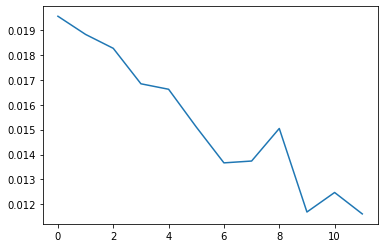

In [16]:
plt.plot(history.history['loss'])

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0288 - accuracy: 0.9928


[0.028794504702091217, 0.9927999973297119]

In [18]:
predictions=model.predict(x_test)

In [19]:
for i in range(y_test.shape[0]):
    if np.argmax(predictions[i])!=np.argmax(y_test[i]):
        print(i)

92
247
321
449
582
583
938
947
1014
1033
1039
1226
1232
1242
1393
1414
1415
1530
1621
1681
1709
1790
1878
1901
1903
2040
2107
2118
2129
2130
2135
2280
2293
2406
2414
2462
2597
2654
2896
2921
2927
2939
3030
3073
3422
3520
3558
3727
3808
3850
3941
4176
4256
4369
4740
4761
5331
5937
5955
6091
6576
6597
6625
9009
9015
9019
9638
9642
9664
9692
9729
9839


In [24]:
test=5937
np.argmax(predictions[test])

3

In [25]:
np.argmax(y_test[test])

5

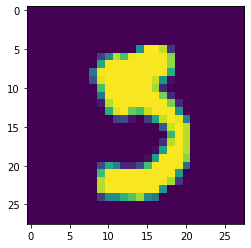

In [26]:
plt.imshow(np.squeeze(x_test[test]))

0 100.0%


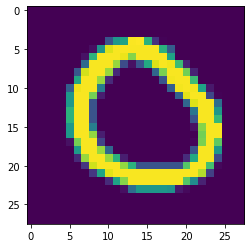

5 99.99978542327881%


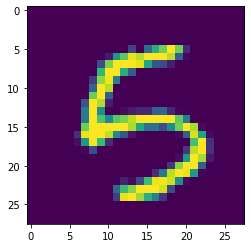

4 100.0%


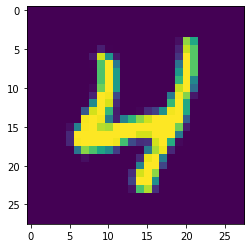

0 99.99996423721313%


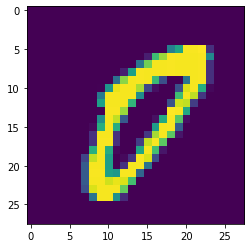

8 100.0%


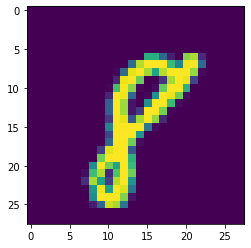

7 100.0%


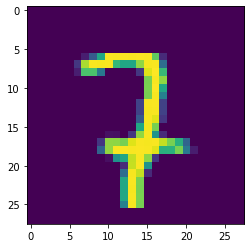

1 100.0%


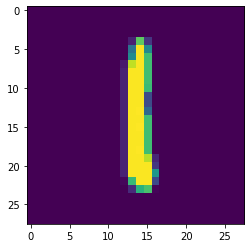

6 100.0%


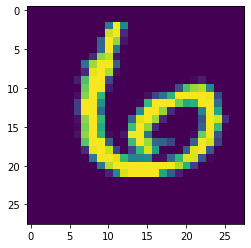

7 100.0%


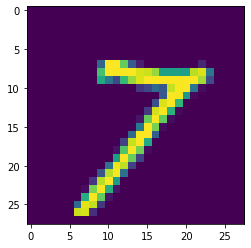

8 100.0%


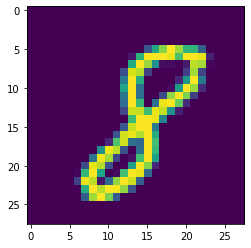

In [68]:
for img in np.random.randint(0, 10000, 10):
    print(np.argmax(predictions[img]), str(np.max(predictions[img])*100)+"%")
    plt.imshow(np.squeeze(x_test[img]))
    plt.show()

In [20]:
predictions.shape

(10000, 10)

In [23]:
model.save("MNIST.h5")